In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

DATA_PATH = '../dataset/population census information/'
RESULT_PATH = '../dataset/pop_result/'

In [3]:
def ReadHhdMap(PATH,FILE):
    household_map = pd.read_csv(PATH + FILE,dtype=object)
    household_map.iloc[:,5:-1] = household_map.iloc[:,5:-1].astype('float')

    return household_map

In [4]:
def ReadPerMap(PATH,FILE):
    person_map = pd.read_csv(PATH + FILE,dtype=object)

    return person_map

In [248]:
pluto_map = gpd.read_file('../dataset/building data/building information/pluto_22v2_geoid.shp')

In [249]:
pluto_map

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,plutomapid,firm07_fla,pfirm15_fl,version,dcpedited,latitude,longitude,notes,GEOID,geometry
0,MN,1,101,101.0,1000100.0,1.000100e+10,1.00,1001.0,2.0,1.0,...,1,NaN,1.0,22v1,None,40.689920,-74.045337,None,36061000100,POINT (-74.04534 40.68992)
1,MN,1,201,101.0,1000100.0,1.000100e+10,1.00,1000.0,2.0,1.0,...,1,NaN,1.0,22v1,None,40.698188,-74.041329,None,36061000100,POINT (-74.04133 40.69819)
2,MN,286,2,103.0,1000201.0,1.000201e+10,2.01,1000.0,1.0,1.0,...,1,NaN,NaN,22v1,None,40.713848,-73.986909,None,36061000201,POINT (-73.98691 40.71385)
3,MN,286,27,103.0,1000201.0,1.000201e+10,2.01,1000.0,1.0,1.0,...,1,NaN,NaN,22v1,None,40.714183,-73.985928,None,36061000201,POINT (-73.98593 40.71418)
4,MN,286,24,103.0,1000201.0,1.000201e+10,2.01,1000.0,1.0,1.0,...,1,NaN,NaN,22v1,None,40.714194,-73.985679,None,36061000201,POINT (-73.98568 40.71419)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859713,MN,798,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,22v1,None,NaN,NaN,None,None,None
859714,MN,1269,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,22v1,None,NaN,NaN,None,None,None
859715,MN,702,8001,104.0,1009903.0,1.009903e+10,99.00,1015.0,2.0,3.0,...,2,NaN,NaN,22v1,None,NaN,NaN,None,None,None
859716,BK,152,9033,302.0,3001100.0,3.001100e+10,11.00,1013.0,13.0,33.0,...,2,NaN,NaN,22v1,None,NaN,NaN,None,None,None


<AxesSubplot:>

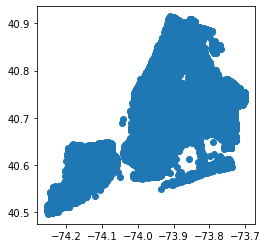

In [16]:
pluto_map.plot()

In [2]:
resident_map = pluto_map[['bct2020','bctcb2020','bldgclass','schooldist','unitsres','resarea','GEOID','geometry']] # area unit is Square Foot
resident_map.dropna(inplace=True)
resident_map = resident_map[resident_map['resarea'] != 0]

NameError: name 'pluto_map' is not defined

In [6]:
resident_map.describe()

,bct2020,bctcb2020,schooldist,unitsres,resarea
count,7.514450e+05,7.514450e+05,751445.000000,751445.000000,7.514450e+05
mean,3.555081e+06,3.555081e+10,22.430882,4.269535,4.205147e+03
std,9.919913e+05,9.919913e+09,7.671904,33.551095,3.116341e+04
min,1.000201e+06,1.000201e+10,1.000000,0.000000,1.000000e+02
25%,3.031401e+06,3.031401e+10,18.000000,1.000000,1.320000e+03
50%,4.011500e+06,4.011500e+10,24.000000,2.000000,1.800000e+03
75%,4.092900e+06,4.092900e+10,29.000000,2.000000,2.504000e+03
max,5.032300e+06,5.032300e+10,32.000000,10914.000000,1.321140e+07


In [7]:
# add building id
ls_bd = []
for i in range(0,len(resident_map)):
    ls_bd.append("{:0>6d}".format(i))

resident_map.reset_index(drop=True, inplace=True)
resident_map['building_id']=pd.DataFrame(ls_bd)

In [3]:
# generate household data
new_res_map = pd.DataFrame({col: np.repeat(resident_map[col], resident_map.unitsres) for col in resident_map.columns})
new_res_map.reset_index(drop=True, inplace=True)

NameError: name 'pd' is not defined

In [5]:
# add household id
ls = []
for i in new_res_map.duplicated('building_id'):
    if i == False:
        n = 0
        ls.append(("{:0>5d}".format(n)))
    else:
        n += 1
        ls.append(("{:0>5d}".format(n)))

new_res_map['household_id'] = pd.DataFrame(ls)
new_res_map['household_id'] = new_res_map['building_id'] + new_res_map['household_id']

NameError: name 'new_res_map' is not defined

In [6]:
new_res_map

NameError: name 'new_res_map' is not defined

: 

In [162]:
# calculate the residential floor area per unit
new_res_map['resarea_per'] = new_res_map.resarea / new_res_map.unitsres
new_res_map = pd.DataFrame.reindex(new_res_map,columns=['building_id','household_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','geometry'])

In [163]:
new_res_map.describe()

,bct2020,schooldist,unitsres,resarea,resarea_per
count,3.208321e+06,3.208321e+06,3.208321e+06,3.208321e+06,3.208321e+06
mean,2.755933e+06,1.625465e+01,2.679222e+02,2.241562e+05,9.832390e+02
std,1.229040e+06,9.896326e+00,1.109232e+03,9.977672e+05,4.669456e+02
min,1.000201e+06,1.000000e+00,1.000000e+00,1.000000e+02,7.807229e+00
25%,2.005600e+06,8.000000e+00,2.000000e+00,2.360000e+03,7.578750e+02
50%,3.029600e+06,1.700000e+01,2.300000e+01,1.736500e+04,9.241429e+02
75%,4.018101e+06,2.500000e+01,1.140000e+02,1.093120e+05,1.120000e+03
max,5.032300e+06,3.200000e+01,1.091400e+04,1.321140e+07,9.225000e+04


# 1. Household size estimation by square footage

- Data source: [AHS table](https://www.census.gov/programs-surveys/ahs/data/interactive/ahstablecreator.html?s_areas=00000&s_year=2019&s_tablename=TABLE8A&s_bygroup1=3&s_bygroup2=6&s_filtergroup1=1&s_filtergroup2=1)
- Datasets: [12_household_size_square_foot.csv](../dataset/population%20census%20information/12_household_type_square_foot.csv); [data processing](../dataset/population%20census%20information/2019%20New%20York%20City%20-%20Household%20Demographics.xlsx)


In [164]:
# import 2019 NYC data of householdtype by floor area
hs_sf_dat = pd.read_csv(DATA_PATH + '12_household_size_square_foot.csv')
hs_sf_dat

,Persons,Total,Less than 500,500 to 749,750 to 999,"1,000 to 1,499","1,500 to 1,999","2,000 to 2,499","2,500 to 2,999","3,000 to 3,999","4,000 or more"
0,1,1835.5,208.0,405.8,442.2,394.0,189.9,105.2,69.0,56.0,30.0
1,2,1814.9,116.9,275.4,329.6,379.8,276.0,185.4,98.9,89.6,63.3
2,3,928.6,34.5,82.3,137.2,225.4,104.5,138.6,98.9,66.9,35.0
3,4,843.2,9.0,38.5,89.3,148.6,152.6,151.0,105.8,67.2,63.4
4,5,401.9,3.0,11.0,58.9,67.6,82.1,80.3,46.0,53.0,25.0
5,6,135.6,2.0,4.0,8.0,33.0,28.0,20.0,12.0,19.0,10.0
6,7,75.0,1.0,1.0,6.0,18.0,16.0,11.0,9.0,7.0,5.0


In [165]:
sum_sf = hs_sf_dat.iloc[:,2:].sum(axis=0)
sum_sf

Less than 500      374.4
500 to 749         818.0
750 to 999        1071.2
1,000 to 1,499    1266.4
1,500 to 1,999     849.1
2,000 to 2,499     691.5
2,500 to 2,999     439.6
3,000 to 3,999     358.7
4,000 or more      231.7
dtype: float64

In [166]:
hs_sf_ratio = hs_sf_dat.iloc[:,2:].div(sum_sf, axis='columns')
hs_sf_ratio

,Less than 500,500 to 749,750 to 999,"1,000 to 1,499","1,500 to 1,999","2,000 to 2,499","2,500 to 2,999","3,000 to 3,999","4,000 or more"
0,0.555556,0.496088,0.412808,0.311118,0.223649,0.152133,0.156961,0.156119,0.129478
1,0.312233,0.336675,0.307692,0.299905,0.325050,0.268113,0.224977,0.249791,0.273198
2,0.092147,0.100611,0.128081,0.177985,0.123071,0.200434,0.224977,0.186507,0.151057
3,0.024038,0.047066,0.083364,0.117340,0.179720,0.218366,0.240673,0.187343,0.273630
4,0.008013,0.013447,0.054985,0.053380,0.096691,0.116124,0.104641,0.147756,0.107898
5,0.005342,0.004890,0.007468,0.026058,0.032976,0.028923,0.027298,0.052969,0.043159
6,0.002671,0.001222,0.005601,0.014214,0.018843,0.015907,0.020473,0.019515,0.021580


In [167]:
num_ls = [1,2,3,4,5,6,7]
prob_ls = [hs_sf_ratio.iloc[:,i].values for i in range(hs_sf_ratio.shape[1])]

In [168]:
np.random.choice(num_ls, p = prob_ls[1].ravel())

1

In [171]:
# assign the household size upon each probability
size_ls = []
for i in new_res_map.resarea_per:
    if i < 500:
        hs_size = np.random.choice(num_ls, p = prob_ls[0].ravel())
    elif 500<= i <= 749:
        hs_size = np.random.choice(num_ls, p = prob_ls[1].ravel())
    elif 750<= i <= 999:
        hs_size = np.random.choice(num_ls, p = prob_ls[2].ravel())
    elif 1000<= i <= 1499:
        hs_size = np.random.choice(num_ls, p = prob_ls[3].ravel())
    elif 1500<= i <= 1999:
        hs_size = np.random.choice(num_ls, p = prob_ls[4].ravel())
    elif 2000<= i <= 2499:
        hs_size = np.random.choice(num_ls, p = prob_ls[5].ravel())
    elif 2500<= i <= 2999:
        hs_size = np.random.choice(num_ls, p = prob_ls[6].ravel())
    elif 3000<= i <= 3999:
        hs_size = np.random.choice(num_ls, p = prob_ls[7].ravel())
    else:
        hs_size = np.random.choice(num_ls, p = prob_ls[8].ravel())
    size_ls.append(hs_size)

In [180]:
new_res_map['hhd_size'] = size_ls
new_res_map['hhd_size'].describe()
# new_res_map.to_csv(RESULT + 'resident_map_household.csv',index=False)


In [175]:
# generate population data
person_map = pd.DataFrame({col: np.repeat(new_res_map[col], new_res_map.hhd_size) for col in new_res_map.columns})
person_map.reset_index(drop=True, inplace=True)

In [176]:
# add personal id
ls = []
for i in person_map.duplicated('household_id'):
    if i == False:
        n = 0
        ls.append(("{:0>2d}".format(n)))
    else:
        n += 1
        ls.append(("{:0>2d}".format(n)))

person_map['personal_id'] = pd.DataFrame(ls)
person_map['personal_id'] = person_map['household_id'] + person_map['personal_id']

In [177]:
person_map = pd.DataFrame.reindex(person_map,columns=['building_id','household_id','personal_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','geometry'])
person_map

,building_id,household_id,personal_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,geometry
0,000000,00000000000,0000000000000,1000201.0,C4,1.0,11.0,7590.0,690.0,1,POINT (-73.98691 40.71385)
1,000000,00000000001,0000000000100,1000201.0,C4,1.0,11.0,7590.0,690.0,2,POINT (-73.98691 40.71385)
2,000000,00000000001,0000000000101,1000201.0,C4,1.0,11.0,7590.0,690.0,2,POINT (-73.98691 40.71385)
3,000000,00000000002,0000000000200,1000201.0,C4,1.0,11.0,7590.0,690.0,2,POINT (-73.98691 40.71385)
4,000000,00000000002,0000000000201,1000201.0,C4,1.0,11.0,7590.0,690.0,2,POINT (-73.98691 40.71385)
...,...,...,...,...,...,...,...,...,...,...,...
6991554,751442,75144200000,7514420000000,5032300.0,A1,31.0,1.0,1960.0,1960.0,1,POINT (-74.17156 40.63913)
6991555,751443,75144300000,7514430000000,5032300.0,B9,31.0,2.0,1350.0,675.0,1,POINT (-74.16911 40.63435)
6991556,751443,75144300001,7514430000100,5032300.0,B9,31.0,2.0,1350.0,675.0,1,POINT (-74.16911 40.63435)
6991557,751444,75144400000,7514440000000,5032300.0,A5,31.0,1.0,1284.0,1284.0,2,POINT (-74.17107 40.62806)


In [3]:
# person_map.to_csv(RESULT_PATH + 'resident_map_person.csv',index=False)

# 2. Household type estimation by square footage

- Data source: [AHS table](https://www.census.gov/programs-surveys/ahs/data/interactive/ahstablecreator.html?s_areas=00000&s_year=2019&s_tablename=TABLE8A&s_bygroup1=3&s_bygroup2=6&s_filtergroup1=1&s_filtergroup2=1)
- Datasets: [13_household_type_square_foot.csv](../dataset/population%20census%20information/13_household_type_square_foot.csv); [data processing](../dataset/population%20census%20information/2019%20New%20York%20City%20-%20Household%20Demographics_hhd_type.xlsx)


In [106]:
type_sf_dat = pd.read_csv('../dataset/population census information/13_household_type_square_foot.csv')
household_map = ReadHhdMap(RESULT_PATH,'resident_map_household.csv')

In [107]:
household_map

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,geometry
0,000000,00000000000,1000201.0,C4,1.0,11.0,7590.0,690.0,1.0,POINT (-73.9869095 40.7138484)
1,000000,00000000001,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484)
2,000000,00000000002,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484)
3,000000,00000000003,1000201.0,C4,1.0,11.0,7590.0,690.0,1.0,POINT (-73.9869095 40.7138484)
4,000000,00000000004,1000201.0,C4,1.0,11.0,7590.0,690.0,5.0,POINT (-73.9869095 40.7138484)
...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1.0,1204.0,1204.0,2.0,POINT (-74.17148899999999 40.6363351)
3208317,751442,75144200000,5032300.0,A1,31.0,1.0,1960.0,1960.0,1.0,POINT (-74.17156110000001 40.6391292)
3208318,751443,75144300000,5032300.0,B9,31.0,2.0,1350.0,675.0,1.0,POINT (-74.1691096 40.6343486)
3208319,751443,75144300001,5032300.0,B9,31.0,2.0,1350.0,675.0,1.0,POINT (-74.1691096 40.6343486)


In [108]:
type_sf_dat

,Type,Total,Less than 500,500 to 749,750 to 999,"1,000 to 1,499","1,500 to 1,999","2,000 to 2,499","2,500 to 2,999","3,000 to 3,999","4,000 or more"
0,"Married-couple families, no nonrelatives",2831.2,83.3,190.9,334.0,578.7,459.1,459.1,331.6,218.4,176.1
1,Other male householder,529.0,11.2,94.7,98.6,100.7,68.7,53.2,21.9,19.0,10.3
2,Other female householder,811.0,67.6,135.5,205.7,169.4,116.8,67.3,28.6,23.7,12.7
3,Male householder,768.0,98.9,170.0,164.7,164.7,67.6,50.9,23.4,21.6,10.5
4,Female householder,1067.5,109.2,235.8,277.5,229.3,122.3,54.4,31.0,21.9,13.3


In [37]:
# two or more
sum_2_type = type_sf_dat.iloc[:3,2:].sum(axis=0)
sum_2_type

# single
sum_1_type = type_sf_dat.iloc[3:,2:].sum(axis=0)
sum_1_type

Less than 500     208.1
500 to 749        405.8
750 to 999        442.2
1,000 to 1,499    394.0
1,500 to 1,999    189.9
2,000 to 2,499    105.3
2,500 to 2,999     54.4
3,000 to 3,999     43.5
4,000 or more      23.8
dtype: float64

In [38]:
type2_sf_ratio = type_sf_dat.iloc[:3,2:].div(sum_2_type, axis='columns')
type2_sf_ratio

type1_sf_ratio = type_sf_dat.iloc[3:,2:].div(sum_1_type, axis='columns')
type1_sf_ratio

,Less than 500,500 to 749,750 to 999,"1,000 to 1,499","1,500 to 1,999","2,000 to 2,499","2,500 to 2,999","3,000 to 3,999","4,000 or more"
3,0.475252,0.418926,0.372456,0.41802,0.355977,0.483381,0.430147,0.496552,0.441176
4,0.524748,0.581074,0.627544,0.58198,0.644023,0.516619,0.569853,0.503448,0.558824


In [40]:
# 2 or more people: 1-married; 2-other male householder; 3-other female householder;
# 1 people: 4-male householder; 5-female householder
type_2_ls = [1,2,3]
prob_2_ls = [type2_sf_ratio.iloc[:,i].values for i in range(type2_sf_ratio.shape[1])]
prob_2_ls

type_1_ls = [4,5]
prob_1_ls = [type1_sf_ratio.iloc[:,i].values for i in range(type1_sf_ratio.shape[1])]
prob_1_ls

[array([0.47525228, 0.52474772]),
 array([0.41892558, 0.58107442]),
 array([0.3724559, 0.6275441]),
 array([0.4180203, 0.5819797]),
 array([0.35597683, 0.64402317]),
 array([0.48338082, 0.51661918]),
 array([0.43014706, 0.56985294]),
 array([0.49655172, 0.50344828]),
 array([0.44117647, 0.55882353])]

In [109]:
household_2_map = household_map[household_map.hhd_size>1]
household_2_map

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,geometry
1,000000,00000000001,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484)
2,000000,00000000002,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484)
4,000000,00000000004,1000201.0,C4,1.0,11.0,7590.0,690.0,5.0,POINT (-73.9869095 40.7138484)
5,000000,00000000005,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484)
9,000000,00000000009,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484)
...,...,...,...,...,...,...,...,...,...,...
3208313,751439,75143900001,5032300.0,B9,31.0,2.0,1350.0,675.0,2.0,POINT (-74.16836499999999 40.6348136)
3208314,751440,75144000000,5032300.0,B9,31.0,2.0,1350.0,675.0,2.0,POINT (-74.1683714 40.6345199)
3208315,751440,75144000001,5032300.0,B9,31.0,2.0,1350.0,675.0,2.0,POINT (-74.1683714 40.6345199)
3208316,751441,75144100000,5032300.0,A5,31.0,1.0,1204.0,1204.0,2.0,POINT (-74.17148899999999 40.6363351)


In [47]:
def Label(df, col, value, prob):
    chas_ls = []
    for i in df[col]:
        if i < 500:
            hs_cha = np.random.choice(value, p = prob[0].ravel())
        elif 500<= i <= 749:
            hs_cha = np.random.choice(value, p = prob[1].ravel())
        elif 750<= i <= 999:
            hs_cha = np.random.choice(value, p = prob[2].ravel())
        elif 1000<= i <= 1499:
            hs_cha = np.random.choice(value, p = prob[3].ravel())
        elif 1500<= i <= 1999:
            hs_cha = np.random.choice(value, p = prob[4].ravel())
        elif 2000<= i <= 2499:
            hs_cha = np.random.choice(value, p = prob[5].ravel())
        elif 2500<= i <= 2999:
            hs_cha = np.random.choice(value, p = prob[6].ravel())
        elif 3000<= i <= 3999:
            hs_cha = np.random.choice(value, p = prob[7].ravel())
        else:
            hs_cha = np.random.choice(value, p = prob[8].ravel())
        chas_ls.append(hs_cha)
    
    return chas_ls

In [195]:
household_2_map.hhd_size.describe()

count    1.964965e+06
mean     2.925346e+00
std      1.181747e+00
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      7.000000e+00
Name: hhd_size, dtype: float64

In [132]:
# assign the household type of 2 or more people upon each probability
household_2_map = household_map[household_map.hhd_size>1]
types_2_ls = Label(household_2_map, 'resarea_per', type_2_ls, prob_2_ls)
household_2_map['hhd_type'] = types_2_ls

# assign the household type of 1 people upon each probability
household_1_map = household_map[household_map.hhd_size==1]
types_1_ls = Label(household_1_map, 'resarea_per', type_1_ls, prob_1_ls)
household_1_map['hhd_type'] = types_1_ls

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [148]:
type_map = pd.concat([household_2_map,household_1_map]).sort_index(ascending=True)
type_map

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,geometry,hhd_type
0,000000,00000000000,1000201.0,C4,1.0,11.0,7590.0,690.0,1.0,POINT (-73.9869095 40.7138484),4
1,000000,00000000001,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484),2
2,000000,00000000002,1000201.0,C4,1.0,11.0,7590.0,690.0,2.0,POINT (-73.9869095 40.7138484),2
3,000000,00000000003,1000201.0,C4,1.0,11.0,7590.0,690.0,1.0,POINT (-73.9869095 40.7138484),5
4,000000,00000000004,1000201.0,C4,1.0,11.0,7590.0,690.0,5.0,POINT (-73.9869095 40.7138484),3
...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1.0,1204.0,1204.0,2.0,POINT (-74.17148899999999 40.6363351),1
3208317,751442,75144200000,5032300.0,A1,31.0,1.0,1960.0,1960.0,1.0,POINT (-74.17156110000001 40.6391292),4
3208318,751443,75144300000,5032300.0,B9,31.0,2.0,1350.0,675.0,1.0,POINT (-74.1691096 40.6343486),5
3208319,751443,75144300001,5032300.0,B9,31.0,2.0,1350.0,675.0,1.0,POINT (-74.1691096 40.6343486),4


In [151]:
type_map = pd.DataFrame.reindex(type_map,columns=['building_id','household_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','hhd_type','geometry'])
# type_map.to_csv(RESULT_PATH + 'resident_map_type.csv',index=False)

In [152]:
# generate population data
person_hhd_map = pd.DataFrame({col: np.repeat(type_map[col], type_map.hhd_size) for col in type_map.columns})
person_hhd_map.reset_index(drop=True, inplace=True)

In [153]:
# add personal id
ls = []
for i in person_hhd_map.duplicated('household_id'):
    if i == False:
        n = 0
        ls.append(("{:0>2d}".format(n)))
    else:
        n += 1
        ls.append(("{:0>2d}".format(n)))

person_hhd_map['personal_id'] = pd.DataFrame(ls)
person_hhd_map['personal_id'] = person_hhd_map['household_id'] + person_hhd_map['personal_id']

In [155]:
person_hhd_map = pd.DataFrame.reindex(person_hhd_map,columns=['building_id','household_id','personal_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','hhd_type','geometry'])
# person_hhd_map.to_csv(RESULT_PATH + 'resident_map_person_hhd_characteristics.csv')

# 3. Householder age estimation by household type

- Data source: [AHS table](https://www.census.gov/programs-surveys/ahs/data/interactive/ahstablecreator.html?s_areas=00000&s_year=2019&s_tablename=TABLE8A&s_bygroup1=3&s_bygroup2=6&s_filtergroup1=1&s_filtergroup2=1)
- Datasets: [14_householder_age_household_type.csv](../dataset/population%20census%20information/14_householder_age_household_type.csv); [data processing](../dataset/population%20census%20information/2019%20New%20York%20City%20-%20Household%20Demographics_hhdr_age.xlsx)


In [167]:
age_type_dat = pd.read_csv(DATA_PATH + '14_householder_age_household_type.csv')
household_map = ReadHhdMap(RESULT_PATH,'resident_map_type.csv')

In [170]:
sum_age = age_type_dat.iloc[:,1:].sum(axis=0)
sum_age

Married-couple families, no nonrelatives    3284.4
Other male householder                       660.2
Other female householder                    1079.6
Male householder                             959.7
Female householder                          1360.7
dtype: float64

In [173]:
age_type_ratio = age_type_dat.iloc[:,1:].div(sum_age, axis='columns')
age_type_ratio

,"Married-couple families, no nonrelatives",Other male householder,Other female householder,Male householder,Female householder
0,0.010748,0.054832,0.033068,0.019694,0.023591
1,0.023444,0.142230,0.064746,0.070230,0.053355
2,0.089910,0.096637,0.103557,0.063562,0.060190
3,0.216569,0.178734,0.204983,0.165052,0.140442
4,0.233285,0.233414,0.226288,0.177451,0.148159
5,0.192303,0.142987,0.200722,0.194853,0.176674
6,0.152752,0.090124,0.092812,0.193498,0.197913
7,0.080989,0.061042,0.073824,0.115661,0.199677


In [177]:
# 0-under 25; 1-25 to 29 years old; 2-30 to 34 years old; 3-35 to 44 years old; 4-45 to 54 years old; 5-55 to 64 years old; 6-65 to 74 years old; 7-75 years old and over
age_ls = [0,1,2,3,4,5,6,7]
prob_ls = [age_type_ratio.iloc[:,i].values for i in range(age_type_ratio.shape[1])]
prob_ls

[array([0.01074778, 0.02344416, 0.08990988, 0.21656924, 0.23328462,
        0.19230301, 0.15275241, 0.08098892]),
 array([0.05483187, 0.14222963, 0.09663738, 0.17873372, 0.23341412,
        0.14298697, 0.0901242 , 0.06104211]),
 array([0.0330678 , 0.0647462 , 0.10355687, 0.20498333, 0.22628751,
        0.20072249, 0.09281215, 0.07382364]),
 array([0.01969365, 0.07023028, 0.06356153, 0.16505158, 0.17745129,
        0.19485256, 0.19349797, 0.11566114]),
 array([0.0235908 , 0.05335489, 0.06018961, 0.14044242, 0.14815904,
        0.17667377, 0.19791284, 0.19967664])]

In [178]:
def LabelAge(df, col, value, prob):
    chas_ls = []
    for i in df[col]:
        if i == 1:
            hs_cha = np.random.choice(value, p = prob[0].ravel())
        elif i == 2:
            hs_cha = np.random.choice(value, p = prob[1].ravel())
        elif i == 3:
            hs_cha = np.random.choice(value, p = prob[2].ravel())
        elif i == 4:
            hs_cha = np.random.choice(value, p = prob[3].ravel())
        elif i == 5:
            hs_cha = np.random.choice(value, p = prob[4].ravel())
        chas_ls.append(hs_cha)
    
    return chas_ls

In [180]:
# assign the householder age upon each probability
ages_ls = Label(household_map, 'hhd_type', age_ls, prob_ls)
household_map['hhdr_age'] = ages_ls

In [183]:
household_map = pd.DataFrame.reindex(household_map,columns=['building_id','household_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','hhd_type','hhdr_age','geometry'])
# household_map.to_csv(RESULT_PATH+'resident_map_hhrage.csv',index=False)

# 4. Children number estimation by householder age

- Data source: [AHS table](https://www.census.gov/programs-surveys/ahs/data/interactive/ahstablecreator.html?s_areas=00000&s_year=2019&s_tablename=TABLE8A&s_bygroup1=3&s_bygroup2=6&s_filtergroup1=1&s_filtergroup2=1)
- Datasets: [15_children_number_householder_age.csv](../dataset/population%20census%20information/15_children_number_householder_age.csv); [data processing](../dataset/population%20census%20information/2019%20New%20York%20City%20-%20Household%20Demographics_child_num.xlsx)


In [87]:
household_map = ReadHhdMap(RESULT_PATH,'resident_map_hhrage.csv')

In [88]:
# count the number of other family members
household_map['num_others'] = pd.DataFrame(np.zeros(household_map.shape[0]))

household_map['num_others'].loc[household_map.hhd_type == 1] = household_map.hhd_size - 2 # except for wife and husband
household_map['num_others'].loc[household_map.hhd_type.isin([2,3])] = household_map.hhd_size - 1 # except for householder

In [94]:
numchild_age_dat = pd.read_csv(DATA_PATH+'15_children_number_householder_age.csv')

In [96]:
numchild_age_dat

,Children num,Total,Under 25 years old,25 to 29 years old,30 to 34 years old,35 to 44 years old,45 to 54 years old,55 to 64 years old,65 to 74 years old,75 years old and over
0,1,978.2,33.046878,79.672118,158.000000,254.0,351.9,125.300000,37.014984,14.012372
1,2,797.8,16.715810,60.480838,93.300000,330.7,264.7,59.300000,18.113859,5.713768
2,3,271.1,3.334498,22.918059,45.730262,157.6,50.8,11.220851,5.769211,2.381784


In [97]:
sum_numchild = numchild_age_dat.iloc[:,2:].sum(axis=0)
sum_numchild

Under 25 years old        53.097186
25 to 29 years old       163.071015
30 to 34 years old       297.030262
35 to 44 years old       742.300000
45 to 54 years old       667.400000
55 to 64 years old       195.820851
65 to 74 years old        60.898054
75 years old and over     22.107925
dtype: float64

In [98]:
numchild_age_ratio = numchild_age_dat.iloc[:,2:].div(sum_numchild, axis='columns')
numchild_age_ratio

,Under 25 years old,25 to 29 years old,30 to 34 years old,35 to 44 years old,45 to 54 years old,55 to 64 years old,65 to 74 years old,75 years old and over
0,0.622385,0.488573,0.531932,0.342180,0.527270,0.639871,0.607819,0.633817
1,0.314815,0.370887,0.314109,0.445507,0.396614,0.302828,0.297446,0.258449
2,0.062800,0.140540,0.153958,0.212313,0.076116,0.057302,0.094736,0.107734


In [99]:
numchild_ls = [1,2,3]
prob_ls = [numchild_age_ratio.iloc[:,i].values for i in range(numchild_age_ratio.shape[1])]
prob_ls

[array([0.62238474, 0.31481536, 0.0627999 ]),
 array([0.48857314, 0.3708865 , 0.14054036]),
 array([0.53193233, 0.31410941, 0.15395826]),
 array([0.34217971, 0.44550721, 0.21231308]),
 array([0.52727   , 0.39661372, 0.07611627]),
 array([0.63987057, 0.30282781, 0.05730162]),
 array([0.60781883, 0.29744561, 0.09473556]),
 array([0.63381673, 0.25844885, 0.10773442])]

In [100]:
def LabelNumChildOld(df, col, value, prob):
    chas_ls = []
    for i, j in zip(df[col],df['num_others']):
        if i == 0:
            hs_cha = np.random.choice(value, p = prob[0].ravel())
        elif i == 1:
            hs_cha = np.random.choice(value, p = prob[1].ravel())
        elif i == 2:
            hs_cha = np.random.choice(value, p = prob[2].ravel())
        elif i == 3:
            hs_cha = np.random.choice(value, p = prob[3].ravel())
        elif i == 4:
            hs_cha = np.random.choice(value, p = prob[4].ravel())
        elif i == 5:
            hs_cha = np.random.choice(value, p = prob[5].ravel())
        elif i == 6:
            hs_cha = np.random.choice(value, p = prob[6].ravel())
        else:
            hs_cha = np.random.choice(value, p = prob[7].ravel())
        
        if hs_cha <= j:
            chas_ls.append(hs_cha)
        else:
            chas_ls.append(j)

    
    return chas_ls

In [101]:
# assign the number of childern upon each probability
numchilds_ls = LabelNumChildOld(household_map, 'hhdr_age', numchild_ls, prob_ls)


In [102]:
household_map['child_num'] = numchilds_ls

In [103]:
household_map['num_others'] = household_map['num_others'] - household_map['child_num']

In [104]:
household_map['num_others'].describe()

count     3208321.0
unique          6.0
top             0.0
freq      2700498.0
Name: num_others, dtype: float64

# 5. The old number estimation by householder age

- Data source: [AHS table](https://www.census.gov/programs-surveys/ahs/data/interactive/ahstablecreator.html?s_areas=00000&s_year=2019&s_tablename=TABLE8A&s_bygroup1=3&s_bygroup2=6&s_filtergroup1=1&s_filtergroup2=1)
- Datasets: [16_old_number_householder_age.csv](../dataset/population%20census%20information/16_old_number_householder_age.csv); [data processing](../dataset/population%20census%20information/2019%20New%20York%20City%20-%20Household%20Demographics_old_num.xlsx)


In [105]:
# Persons 65 Years Old and Over
# household_map = pd.read_csv(DATA_PATH + '../dataset/pop_result/resident_map_hhrage.csv')
numold_age_dat = pd.read_csv(DATA_PATH + '16_old_number_householder_age.csv')

In [106]:
numold_age_dat

,Old num,Total,Under 25 years old,25 to 29 years old,30 to 34 years old,35 to 44 years old,45 to 54 years old,55 to 64 years old,65 to 74 years old,75 years old and over
0,1,1444.6,1.737378,3.594576,9.166168,45.800000,44.000000,131.40000,711.6,480.5
1,2,738.0,0.341009,0.341009,1.648209,4.774124,6.763342,7.33169,404.9,288.3


In [107]:
sum_numold = numold_age_dat.iloc[:,2:].sum(axis=0)
sum_numold

Under 25 years old          2.078387
25 to 29 years old          3.935584
30 to 34 years old         10.814377
35 to 44 years old         50.574124
45 to 54 years old         50.763342
55 to 64 years old        138.731690
65 to 74 years old       1116.500000
75 years old and over     768.800000
dtype: float64

In [108]:
numold_age_ratio = numold_age_dat.iloc[:,2:].div(sum_numold, axis='columns')
numold_age_ratio

,Under 25 years old,25 to 29 years old,30 to 34 years old,35 to 44 years old,45 to 54 years old,55 to 64 years old,65 to 74 years old,75 years old and over
0,0.835926,0.913352,0.847591,0.905601,0.866767,0.947152,0.637349,0.625
1,0.164074,0.086648,0.152409,0.094399,0.133233,0.052848,0.362651,0.375


In [109]:
numold_ls = [1,2]
prob_ls = [numold_age_ratio.iloc[:,i].values for i in range(numold_age_ratio.shape[1])]
prob_ls

[array([0.8359262, 0.1640738]),
 array([0.91335242, 0.08664758]),
 array([0.8475909, 0.1524091]),
 array([0.90560145, 0.09439855]),
 array([0.8667672, 0.1332328]),
 array([0.94715201, 0.05284799]),
 array([0.63734886, 0.36265114]),
 array([0.625, 0.375])]

In [110]:
# assign the number of childern upon each probability
numolds_ls = LabelNumChildOld(household_map, 'hhdr_age', numold_ls, prob_ls)
household_map['old_num'] = numolds_ls

In [111]:
household_map

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,hhdr_age,geometry,num_others,child_num,old_num
0,000000,00000000000,1000201.0,C4,1.0,11,7590,690,1,4,5,POINT (-73.9869095 40.7138484),0,0.0,0.0
1,000000,00000000001,1000201.0,C4,1.0,11,7590,690,2,2,3,POINT (-73.9869095 40.7138484),0,1.0,0.0
2,000000,00000000002,1000201.0,C4,1.0,11,7590,690,2,2,4,POINT (-73.9869095 40.7138484),0,1.0,0.0
3,000000,00000000003,1000201.0,C4,1.0,11,7590,690,1,5,6,POINT (-73.9869095 40.7138484),0,0.0,0.0
4,000000,00000000004,1000201.0,C4,1.0,11,7590,690,5,3,7,POINT (-73.9869095 40.7138484),3,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1,1204,1204,2,1,4,POINT (-74.17148899999999 40.6363351),0,0.0,0.0
3208317,751442,75144200000,5032300.0,A1,31.0,1,1960,1960,1,4,4,POINT (-74.17156110000001 40.6391292),0,0.0,0.0
3208318,751443,75144300000,5032300.0,B9,31.0,2,1350,675,1,5,5,POINT (-74.1691096 40.6343486),0,0.0,0.0
3208319,751443,75144300001,5032300.0,B9,31.0,2,1350,675,1,4,5,POINT (-74.1691096 40.6343486),0,0.0,0.0


# 6. The other adult number estimation

In [114]:
household_map['other_adult_num'] = household_map.num_others - household_map.old_num

In [115]:
household_map.other_adult_num.describe()

count     3208321.0
unique          5.0
top             0.0
freq      2999936.0
Name: other_adult_num, dtype: float64

In [120]:
household_map = pd.DataFrame.reindex(household_map,columns=['building_id','household_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','hhd_type','hhdr_age','child_num','old_num','other_adult_num','geometry'])
# household_map.to_csv(RESULT_PATH + 'resident_map_all_num.csv',index=False)

# 7. Householder sex estimation (including spouse)

In [148]:
# 2 or more people: 1-married; 2-other male householder; 3-other female householder;
# 1 people: 4-male householder; 5-female householder
# 0-Male; 1-Female

In [121]:
household_map = ReadHhdMap(RESULT_PATH, 'resident_map_all_num.csv')

In [122]:
# single household
# 1 people: 4-male householder; 5-female householder
# male householder
male_1_map = household_map[household_map.hhd_type == 4]
male_1_map['hhdr_sex'] = 0

# female householder
fe_1_map = household_map[household_map.hhd_type == 5]
fe_1_map['hhdr_sex'] = 1

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [123]:
# 2 or more people: 1-married; 2-other male householder; 3-other female householder;
# other male householder
male_2_map = household_map[household_map.hhd_type == 2]
male_2_map['hhdr_sex'] = 0

# other female householder
fe_2_map = household_map[household_map.hhd_type == 3]
fe_2_map['hhdr_sex'] = 1

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
mar_map = household_map[household_map.hhd_type == 1]

1. Married households

**The Law of Total Probability for 2 more people**:    
$P(male) = P(male|married) \times P(married) + P(male|unmarried) \times P(unmarried)$    
$P(male|married) = \frac{P(male) - P(male|unmarried) \times P(unmarried) }{P(married)}$


[ACS data source(B09019)](https://data.census.gov/cedsci/table?q=United%20States&t=Families%20and%20Living%20Arrangements&g=0500000US36005,36047,36061,36081,36085&tid=ACSDT5Y2020.B09019)

In [125]:
type_data = pd.read_csv(DATA_PATH + '13_household_type_square_foot.csv')

In [126]:
# calculate the prob of male in married people
p_m = 45590326 / (45590326 + 42509361)
p_mar = type_data.iloc[0,1] / (type_data.iloc[0,1] + type_data.iloc[1,1] + type_data.iloc[2,1])
p_unmar = 1 - p_mar
p_m_unmar = type_data.iloc[1,1] / (type_data.iloc[1,1] + type_data.iloc[2,1])

In [127]:
p_m_mar = ( p_m - p_m_unmar * p_unmar) / p_mar
p_m_mar

0.57556380609677

In [128]:
gender_ls = [0,1]
prob_ls = np.array([p_m_mar, 1-p_m_mar])

In [129]:
# 0-opposite; 1-same
opsa_ls = [0,1]
prob_opsa_ls = np.array([58140848/(58140848 + 576186), 1 - 58140848/(58140848 + 576186)])

In [130]:
genders_ls = []
opsas_ls = []
for i in range(mar_map.shape[0]):

    sex=np.random.choice(gender_ls, p = prob_ls.ravel())
    opsa=np.random.choice(opsa_ls, p = prob_opsa_ls.ravel())
    
    genders_ls.append(sex)
    opsas_ls.append(opsa)

In [131]:
mar_map['hhdr_sex'] = genders_ls
mar_map['op_same'] = opsas_ls

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
mar_map[mar_map.hhdr_sex == 0][mar_map.op_same == 1]

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,hhdr_age,child_num,old_num,other_adult_num,geometry,hhdr_sex,op_same
114,000013,00001300013,1000201.0,C7,1.0,26,17309,665.731,2,1,4,0,0,0,POINT (-73.98698880000001 40.7140927),0,1
202,000018,00001800009,1000201.0,C1,1.0,10,6456,645.6,2,1,4,0,0,0,POINT (-73.9866497 40.7138731),0,1
719,000020,00002000024,1000201.0,D6,1.0,250,275260,1101.04,4,1,5,2,0,0,POINT (-73.9862139 40.7108812),0,1
1125,000028,00002800081,1000202.0,D4,1.0,124,124600,1004.84,2,1,4,0,0,0,POINT (-73.9842733 40.7110018),0,1
1142,000028,00002800098,1000202.0,D4,1.0,124,124600,1004.84,3,1,4,1,0,0,POINT (-73.9842733 40.7110018),0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206283,750502,75050200001,5031902.0,B3,31.0,2,1546,773,2,1,5,0,0,0,POINT (-74.1617179 40.6364536),0,1
3206637,750752,75075200000,5031902.0,B2,31.0,2,2650,1325,2,1,6,0,0,0,POINT (-74.1631977 40.6375027),0,1
3206833,750877,75087700001,5031902.0,B2,31.0,2,3080,1540,2,1,4,0,0,0,POINT (-74.16697859999999 40.6394186),0,1
3206893,750916,75091600000,5031902.0,A1,31.0,1,1184,1184,7,1,5,3,1,1,POINT (-74.167839 40.6377129),0,1


2. spouse gender

In [133]:
# opposite-sex
male_op_map = mar_map[mar_map.hhdr_sex == 0][mar_map.op_same == 0]
male_op_map['sp_sex'] = 1
# same-sax
male_same_map = mar_map[mar_map.hhdr_sex == 0][mar_map.op_same == 1]
male_same_map['sp_sex'] = 0

# opposite-sex
fe_op_map = mar_map[mar_map.hhdr_sex == 1][mar_map.op_same == 0]
fe_op_map['sp_sex'] = 0
# smae-sex
fe_same_map = mar_map[mar_map.hhdr_sex == 1][mar_map.op_same == 1]
fe_same_map['sp_sex'] = 1

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [134]:
household_map = pd.concat([male_op_map,male_same_map,fe_op_map,fe_same_map,fe_2_map,fe_1_map,male_2_map,male_1_map]).sort_index(ascending=True)

In [135]:
household_map

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,hhdr_age,child_num,old_num,other_adult_num,geometry,hhdr_sex,op_same,sp_sex
0,000000,00000000000,1000201.0,C4,1.0,11,7590,690,1,4,5,0,0,0,POINT (-73.9869095 40.7138484),0,NaN,NaN
1,000000,00000000001,1000201.0,C4,1.0,11,7590,690,2,2,3,1,0,0,POINT (-73.9869095 40.7138484),0,NaN,NaN
2,000000,00000000002,1000201.0,C4,1.0,11,7590,690,2,2,4,1,0,0,POINT (-73.9869095 40.7138484),0,NaN,NaN
3,000000,00000000003,1000201.0,C4,1.0,11,7590,690,1,5,6,0,0,0,POINT (-73.9869095 40.7138484),1,NaN,NaN
4,000000,00000000004,1000201.0,C4,1.0,11,7590,690,5,3,7,1,2,1,POINT (-73.9869095 40.7138484),1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1,1204,1204,2,1,4,0,0,0,POINT (-74.17148899999999 40.6363351),0,0.0,1.0
3208317,751442,75144200000,5032300.0,A1,31.0,1,1960,1960,1,4,4,0,0,0,POINT (-74.17156110000001 40.6391292),0,NaN,NaN
3208318,751443,75144300000,5032300.0,B9,31.0,2,1350,675,1,5,5,0,0,0,POINT (-74.1691096 40.6343486),1,NaN,NaN
3208319,751443,75144300001,5032300.0,B9,31.0,2,1350,675,1,4,5,0,0,0,POINT (-74.1691096 40.6343486),0,NaN,NaN


In [144]:
household_map['hhd_type'].loc[household_map['op_same'] == 1] = 0 # same-sax household

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [143]:
household_map = pd.DataFrame.reindex(household_map,columns=['building_id','household_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','hhd_type','child_num','old_num','other_adult_num','hhdr_age','hhdr_sex','op_same','sp_sex','geometry'])
household_map.to_csv(RESULT_PATH + 'resident_map_hddr_sex.csv',index=False)

3. Opposite-sex spouse age

Data source: [spouse age gap](https://www2.census.gov/programs-surveys/demo/tables/families/2021/cps-2021/tabfg3-all.xls)

In [146]:
household_map = ReadHhdMap(RESULT_PATH, 'resident_map_hddr_sex.csv')
num_op_ag = pd.read_csv(DATA_PATH + '11_opposit_married_age_difference.csv')

In [147]:
num_op_ag

,Age difference,Total of all married couples,Total of without own children under 18,Total of with own children under 18
0,..Husband 20+ years older than wife,691,389,301
1,..Husband 15-19 years older than wife,1005,635,370
2,..Husband 10-14 years older than wife,3029,1915,1114
3,..Husband 6-9 years older than wife,6835,4189,2646
4,..Husband 4-5 years older than wife,7733,4836,2896
5,..Husband 2-3 years older than wife,12157,7320,4838
6,..Husband and wife within 1 year(husband),11153,6978,4175
7,..Husband and wife within 1 year(wife),11153,6978,4175
8,..Wife 2-3 years older than husband,4448,2754,1694
9,..Wife 4-5 years older than husband,2186,1431,755


In [148]:
# for husband
husband_map = household_map[(household_map['sp_sex'] == 0) & (household_map['op_same'] == 0)]

sum_numag_m = num_op_ag.iloc[:7,2:].sum(axis=0)
sum_numag_m

num_mop_ag_ratio = num_op_ag.iloc[:7,2:].div(sum_numag_m, axis='columns')
num_mop_ag_ratio

num_mopag_ls = [0,1,2,3,4,5,6]
prob_m_ls = [num_mop_ag_ratio.iloc[:,i].values for i in range(num_mop_ag_ratio.shape[1])]
prob_m_ls

[array([0.01481228, 0.02417942, 0.07291905, 0.15950803, 0.18414439,
        0.27872972, 0.26570711]),
 array([0.01842105, 0.02264382, 0.06817625, 0.1619339 , 0.17723378,
        0.29608323, 0.25550796])]

In [149]:
# for wife
wife_map = household_map[(household_map['sp_sex'] == 1) & (household_map['op_same'] == 0)]

sum_numag_f = num_op_ag.iloc[7:,2:].sum(axis=0)
sum_numag_f

num_fop_ag_ratio = num_op_ag.iloc[7:,2:].div(sum_numag_f, axis='columns')
num_fop_ag_ratio

num_fopag_ls = [6,5,4,3,2,1,0]
prob_f_ls = [num_fop_ag_ratio.iloc[:,i].values for i in range(num_fop_ag_ratio.shape[1])]
prob_f_ls

[array([0.53157614, 0.2097966 , 0.10901196, 0.09171936, 0.03336634,
        0.01157919, 0.01295041]),
 array([0.56380824, 0.22876435, 0.10195814, 0.06225523, 0.02255233,
        0.00783255, 0.01282917])]

In [150]:
def LabelAgeSpouse(df, col, value, prob):
    chas_ls = []
    for i in df[col]:
        if i == 0:
            hs_cha = np.random.choice(value, p = prob[0].ravel())
        else:
            hs_cha = np.random.choice(value, p = prob[1].ravel())
        
        chas_ls.append(hs_cha)
    
    return chas_ls

In [151]:
# assign the husban age upon each probability
num_mopags_ls = LabelAgeSpouse(husband_map, 'child_num', num_mopag_ls, prob_m_ls)
husband_map['op_ag'] = num_mopags_ls

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
# assign the wife age upon each probability
num_fopags_ls = LabelAgeSpouse(wife_map, 'child_num', num_fopag_ls, prob_f_ls)
wife_map['op_ag'] = num_fopags_ls

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
mar_op_map = pd.concat([husband_map,wife_map],axis=0)
household_map = pd.merge(household_map,mar_op_map[['household_id','op_ag']],how='left',on='household_id')


In [154]:
# age range of householders
hhdr_age_ls = [[19,24],[25,29],[30,34],[35,44],[45,54],[55,64],[65,74],[75,100]]

household_map['hhdr_age_min'] = pd.Series(np.zeros(household_map.shape[0]))
household_map['hhdr_age_max'] = pd.Series(np.zeros(household_map.shape[0]))

# household_map['hhdr_age'] = household_map['hhdr_age'].astype('float')
for i in range(len(hhdr_age_ls)):
    household_map['hhdr_age_min'].loc[household_map['hhdr_age'] == i] = hhdr_age_ls[i][0]
    household_map['hhdr_age_max'].loc[household_map['hhdr_age'] == i] = hhdr_age_ls[i][1]

household_map

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,...,old_num,other_adult_num,hhdr_age,hhdr_sex,op_same,sp_sex,geometry,op_ag,hhdr_age_min,hhdr_age_max
0,000000,00000000000,1000201.0,C4,1.0,11,7590,690,1,4,...,0,0,5,0,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,55.0,64.0
1,000000,00000000001,1000201.0,C4,1.0,11,7590,690,2,2,...,0,0,3,0,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,35.0,44.0
2,000000,00000000002,1000201.0,C4,1.0,11,7590,690,2,2,...,0,0,4,0,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,45.0,54.0
3,000000,00000000003,1000201.0,C4,1.0,11,7590,690,1,5,...,0,0,6,1,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,65.0,74.0
4,000000,00000000004,1000201.0,C4,1.0,11,7590,690,5,3,...,2,1,7,1,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,75.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1,1204,1204,2,1,...,0,0,4,0,0,1,POINT (-74.17148899999999 40.6363351),3.0,45.0,54.0
3208317,751442,75144200000,5032300.0,A1,31.0,1,1960,1960,1,4,...,0,0,4,0,NaN,NaN,POINT (-74.17156110000001 40.6391292),NaN,45.0,54.0
3208318,751443,75144300000,5032300.0,B9,31.0,2,1350,675,1,5,...,0,0,5,1,NaN,NaN,POINT (-74.1691096 40.6343486),NaN,55.0,64.0
3208319,751443,75144300001,5032300.0,B9,31.0,2,1350,675,1,4,...,0,0,5,0,NaN,NaN,POINT (-74.1691096 40.6343486),NaN,55.0,64.0


In [155]:
# age gap of spouses
opag_range_ls = [[20,25],[15,19],[10,14],[6,9],[4,5],[2,3],[0,1]]

household_map['op_ag_min'] = pd.Series(np.zeros(household_map.shape[0]))
household_map['op_ag_max'] = pd.Series(np.zeros(household_map.shape[0]))

for i in range(len(opag_range_ls)):
    household_map['op_ag_min'].loc[household_map['op_ag'] == i] = opag_range_ls[i][0]
    household_map['op_ag_max'].loc[household_map['op_ag'] == i] = opag_range_ls[i][1]

household_map

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,...,hhdr_age,hhdr_sex,op_same,sp_sex,geometry,op_ag,hhdr_age_min,hhdr_age_max,op_ag_min,op_ag_max
0,000000,00000000000,1000201.0,C4,1.0,11,7590,690,1,4,...,5,0,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,55.0,64.0,0.0,0.0
1,000000,00000000001,1000201.0,C4,1.0,11,7590,690,2,2,...,3,0,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,35.0,44.0,0.0,0.0
2,000000,00000000002,1000201.0,C4,1.0,11,7590,690,2,2,...,4,0,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,45.0,54.0,0.0,0.0
3,000000,00000000003,1000201.0,C4,1.0,11,7590,690,1,5,...,6,1,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,65.0,74.0,0.0,0.0
4,000000,00000000004,1000201.0,C4,1.0,11,7590,690,5,3,...,7,1,NaN,NaN,POINT (-73.9869095 40.7138484),NaN,75.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1,1204,1204,2,1,...,4,0,0,1,POINT (-74.17148899999999 40.6363351),3.0,45.0,54.0,6.0,9.0
3208317,751442,75144200000,5032300.0,A1,31.0,1,1960,1960,1,4,...,4,0,NaN,NaN,POINT (-74.17156110000001 40.6391292),NaN,45.0,54.0,0.0,0.0
3208318,751443,75144300000,5032300.0,B9,31.0,2,1350,675,1,5,...,5,1,NaN,NaN,POINT (-74.1691096 40.6343486),NaN,55.0,64.0,0.0,0.0
3208319,751443,75144300001,5032300.0,B9,31.0,2,1350,675,1,4,...,5,0,NaN,NaN,POINT (-74.1691096 40.6343486),NaN,55.0,64.0,0.0,0.0


In [156]:
household_map['op_age_avg'] = pd.Series(np.zeros(household_map.shape[0]))

household_map['op_age_avg'].loc[household_map['op_ag'] > 0] = ((household_map['hhdr_age_min'] + household_map['op_ag_min']) + (household_map['hhdr_age_max'] + household_map['op_ag_max'])) / 2

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [157]:
hhdr_age_ls = [[19,24],[25,29],[30,34],[35,44],[45,54],[55,64],[65,74],[75,150]]
# 0-under 25; 1-25 to 29 years old; 2-30 to 34 years old; 3-35 to 44 years old; 4-45 to 54 years old; 5-55 to 64 years old; 6-65 to 74 years old; 7-75 years old and over
age_ls = [0,1,2,3,4,5,6,7]

household_map['op_sp_age'] = pd.Series(np.zeros(household_map.shape[0]))

for i,j in zip(hhdr_age_ls,age_ls):
    household_map['op_sp_age'].loc[(household_map['op_age_avg'] >= i[0]) & (household_map['op_age_avg'] <= i[1])] = j


d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

4. Same-sex spouse

In [158]:
num_sa_ag = num_op_ag.copy()

In [159]:
# for husband
same_map = household_map[household_map['op_same']==1]

sum_numag_sa = num_sa_ag.iloc[:7,2:].sum(axis=0)
sum_numag_sa

num_sa_ag_ratio = num_sa_ag.iloc[:7,2:].div(sum_numag_sa, axis='columns')
num_sa_ag_ratio

num_saag_ls = [0,1,2,3,4,5,6]
prob_sa_ls = [num_sa_ag_ratio.iloc[:,i].values for i in range(num_sa_ag_ratio.shape[1])]
prob_sa_ls

[array([0.01481228, 0.02417942, 0.07291905, 0.15950803, 0.18414439,
        0.27872972, 0.26570711]),
 array([0.01842105, 0.02264382, 0.06817625, 0.1619339 , 0.17723378,
        0.29608323, 0.25550796])]

In [160]:
# assign the same-sex age upon each probability
num_saags_ls = LabelAgeSpouse(same_map, 'child_num', num_saag_ls, prob_sa_ls)
same_map['sa_ag'] = num_saags_ls

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
household_map = pd.merge(household_map,same_map[['household_id','sa_ag']],how='left',on='household_id')


In [162]:
# age gap of same-sex spouses
saag_range_ls = [[20,25],[15,19],[10,14],[6,9],[4,5],[2,3],[0,1]]

household_map['sa_ag_min'] = pd.Series(np.zeros(household_map.shape[0]))
household_map['sa_ag_max'] = pd.Series(np.zeros(household_map.shape[0]))

for i in range(len(saag_range_ls)):
    household_map['sa_ag_min'].loc[household_map['sa_ag'] == i] = saag_range_ls[i][0]
    household_map['sa_ag_max'].loc[household_map['sa_ag'] == i] = saag_range_ls[i][1]

household_map

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,...,op_ag,hhdr_age_min,hhdr_age_max,op_ag_min,op_ag_max,op_age_avg,op_sp_age,sa_ag,sa_ag_min,sa_ag_max
0,000000,00000000000,1000201.0,C4,1.0,11,7590,690,1,4,...,NaN,55.0,64.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1,000000,00000000001,1000201.0,C4,1.0,11,7590,690,2,2,...,NaN,35.0,44.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,000000,00000000002,1000201.0,C4,1.0,11,7590,690,2,2,...,NaN,45.0,54.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,000000,00000000003,1000201.0,C4,1.0,11,7590,690,1,5,...,NaN,65.0,74.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4,000000,00000000004,1000201.0,C4,1.0,11,7590,690,5,3,...,NaN,75.0,100.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1,1204,1204,2,1,...,3.0,45.0,54.0,6.0,9.0,57.0,5.0,NaN,0.0,0.0
3208317,751442,75144200000,5032300.0,A1,31.0,1,1960,1960,1,4,...,NaN,45.0,54.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3208318,751443,75144300000,5032300.0,B9,31.0,2,1350,675,1,5,...,NaN,55.0,64.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3208319,751443,75144300001,5032300.0,B9,31.0,2,1350,675,1,4,...,NaN,55.0,64.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [163]:
household_map['sa_age_avg'] = pd.Series(np.zeros(household_map.shape[0]))

household_map['sa_age_avg'].loc[household_map['sa_ag'] > 0] = ((household_map['hhdr_age_min'] + household_map['sa_ag_min']) + (household_map['hhdr_age_max'] + household_map['sa_ag_max'])) / 2

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [164]:
household_map['sa_sp_age'] = pd.Series(np.zeros(household_map.shape[0]))

for i,j in zip(hhdr_age_ls,age_ls):
    household_map['sa_sp_age'].loc[(household_map['sa_age_avg'] >= i[0]) & (household_map['sa_age_avg'] <= i[1])] = j


d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [165]:
household_map = pd.DataFrame.reindex(household_map,columns=['building_id','household_id','bct2020','bldgclass','schooldist','unitsres','resarea','resarea_per','hhd_size','hhd_type','child_num','old_num','other_adult_num','hhdr_age','hhdr_sex','op_same','sp_sex','hhdr_age_min','hhdr_age_max','op_sp_age','sa_sp_age','geometry'])
# household_map.to_csv(RESULT_PATH + 'resident_map_spouse_sex_age.csv',index=False)

# 8. Children role estimation

In [55]:
household_map = ReadHhdMap(RESULT_PATH, 'resident_map_spouse_sex_age.csv')
person_map = ReadPerMap(RESULT_PATH, 'resident_map_person.csv')

In [56]:
household_map[(household_map.hhd_type == 0) & (household_map.hhd_size >2)].child_num.sum()

7547.0

In [57]:
person_map = person_map[['building_id', 'household_id', 'personal_id', 'geometry']]
person_map = pd.merge(person_map,household_map[['household_id','hhd_type','child_num','old_num','other_adult_num']],how='left',on='household_id')


In [58]:
person_map['role'] = person_map['personal_id'].astype('string').str.slice(-2,).astype('float')

In [59]:
# h-householder; s-spouse; c-children; o-the old; a-other adults
role_ls=['h', 's', 'c', 'o', 'a']

person_map['role'].loc[person_map['role'] == 0] = role_ls[0] # householder
person_map['role'].loc[(person_map['role'] == 1) & (person_map['hhd_type'].isin([0,1]))] = role_ls[1] # spouse

# # children
# def others_map(df,name,ls):
#     return df.loc[(df[name].isin(ls) == 0)]

# def LabelRole(df, name, ls):
#     df = others_map(df,name,ls)
#     df[name].loc[(df[name]-1 <= df[name]) & (df['hhdf_type'].isin([0,1]))] = df[2] # married household
#     df = others_map(df,name,ls)
#     df[name].loc[(df[name] <= df[name]) & (df['hhd_type'] >= 2)] = df[2] # other household
#     return df
    
# LabelRole(person_map,'role',role_ls)

# others_map['role'].loc[(others_map['role']-1 <= others_map['child_num']) & (others_map['hhd_type'].isin([0,1]))] = role_ls[2] # married household
# # others_map = person_map[person_map['role'].map(lambda x: isnotin(x, role_ls))]
# others_map['role'].loc[(others_map['role'] <= others_map['child_num']) & (others_map['hhd_type'] >= 2)] = role_ls[2] # other household




d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [63]:
print('Children number:', household_map.child_num.sum())
print('The old number:', household_map.old_num.sum())
print('Others number:', household_map.other_adult_num.sum())


Children number: 1763153.0
The old number: 547212.0
Others number: 311719.0


In [197]:
others_map = person_map.copy()

In [198]:
others_map.old_num += others_map.child_num
others_map.other_adult_num += others_map.old_num

In [199]:
# children
def OtherMap(df,ls):
    return df.loc[(df['role'].isin(ls) == 0)]
    
def LabelRole(df, name, ls, i):
    df_1 = OtherMap(df,ls)
    df_1['role'].loc[(df_1['role']-1 <= df_1[name[i]]) & (df_1['hhd_type'].isin([0,1]))] = ls[2+i] # married household
    df_2 = OtherMap(df_1,ls)
    df_2['role'].loc[(df_2['role'] <= df_2[name[i]]) & (df_2['hhd_type'] > 1)] = ls[2+i] # other household

    df_3 = pd.concat([df_1,df_2]) # find this role
    df_role = df_3[df_3['role'] == ls[2+i]]
    df = df.drop(df_role.index)
    df = pd.concat([df, df_role])
    return df

In [200]:
for i in range(3):
    others_map = LabelRole(others_map,others_col,role_ls,i)

d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
d:\Anaconda\envs\cusplondon2\lib\sit

In [204]:
others_map[others_map.role == 'c']

,building_id,household_id,personal_id,geometry,hhd_type,child_num,old_num,other_adult_num,role
34,000002,00000200004,0000020000402,POINT (-73.9856793 40.7141941),1,1,1,1,c
61,000004,00000400002,0000040000202,POINT (-73.9863143 40.7139005),1,1,2,2,c
76,000005,00000500006,0000050000602,POINT (-73.98605449999999 40.7139224),1,1,1,1,c
81,000005,00000500009,0000050000902,POINT (-73.98605449999999 40.7139224),1,2,3,3,c
82,000005,00000500009,0000050000903,POINT (-73.98605449999999 40.7139224),1,2,3,3,c
...,...,...,...,...,...,...,...,...,...
6991535,751435,75143500000,7514350000001,POINT (-74.1714848 40.6360798),3,1,1,1,c
6991545,751439,75143900000,7514390000001,POINT (-74.16836499999999 40.6348136),3,1,1,1,c
6991547,751439,75143900001,7514390000101,POINT (-74.16836499999999 40.6348136),3,1,1,1,c
6991549,751440,75144000000,7514400000001,POINT (-74.1683714 40.6345199),2,1,1,1,c


In [207]:
person_map = others_map.sort_index(ascending=True)

In [210]:
# person_map.to_csv(RESULT_PATH+'person_map.csv',index=False)

# 9. Add sex and age for householders and spouses

In [7]:
household_map = ReadHhdMap(RESULT_PATH, 'resident_map_spouse_sex_age.csv')
person_map = ReadPerMap(RESULT_PATH, 'person_map.csv')

In [8]:
household_map['sp_age'] = household_map['op_sp_age'] + household_map['sa_sp_age']

In [9]:
household_map

,building_id,household_id,bct2020,bldgclass,schooldist,unitsres,resarea,resarea_per,hhd_size,hhd_type,...,hhdr_age,hhdr_sex,op_same,sp_sex,hhdr_age_min,hhdr_age_max,op_sp_age,sa_sp_age,geometry,sp_age
0,000000,00000000000,1000201.0,C4,1.0,11,7590,690,1,4,...,5,0,NaN,NaN,55,64,0,0,POINT (-73.9869095 40.7138484),0
1,000000,00000000001,1000201.0,C4,1.0,11,7590,690,2,2,...,3,0,NaN,NaN,35,44,0,0,POINT (-73.9869095 40.7138484),0
2,000000,00000000002,1000201.0,C4,1.0,11,7590,690,2,2,...,4,0,NaN,NaN,45,54,0,0,POINT (-73.9869095 40.7138484),0
3,000000,00000000003,1000201.0,C4,1.0,11,7590,690,1,5,...,6,1,NaN,NaN,65,74,0,0,POINT (-73.9869095 40.7138484),0
4,000000,00000000004,1000201.0,C4,1.0,11,7590,690,5,3,...,7,1,NaN,NaN,75,100,0,0,POINT (-73.9869095 40.7138484),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208316,751441,75144100000,5032300.0,A5,31.0,1,1204,1204,2,1,...,4,0,0,1,45,54,5,0,POINT (-74.17148899999999 40.6363351),5
3208317,751442,75144200000,5032300.0,A1,31.0,1,1960,1960,1,4,...,4,0,NaN,NaN,45,54,0,0,POINT (-74.17156110000001 40.6391292),0
3208318,751443,75144300000,5032300.0,B9,31.0,2,1350,675,1,5,...,5,1,NaN,NaN,55,64,0,0,POINT (-74.1691096 40.6343486),0
3208319,751443,75144300001,5032300.0,B9,31.0,2,1350,675,1,4,...,5,0,NaN,NaN,55,64,0,0,POINT (-74.1691096 40.6343486),0


In [10]:
def AddAgeSex(df_per,df_hhd,char_ls, label_ls,label_i,char_j):
    label =label_ls[label_i]
    char = char_ls[char_j]


    if label == 'h':
        char_hhd_sp = ['hhdr_age','hhdr_sex']
        hhd_type = [0,1,2,3,4,5]
    elif label == 's':
        char_hhd_sp = ['sp_age','sp_sex']
        hhd_type = [0,1]

    df_per[char] =  pd.DataFrame(np.zeros(df_per.shape[0]))
    df_role = df_per[df_per['role'] == label]
    index_role = df_role.index
    df_per = df_per.drop(index_role)

    role_char = df_hhd[char_hhd_sp[char_j]].loc[df_hhd['hhd_type'].isin(hhd_type)]
    df_role.reset_index(drop=True, inplace=True)
    role_char.reset_index(drop=True,inplace=True)
    df_role[char] = role_char
    df_role.index = index_role

    df_per = pd.concat([df_per,df_role])
    df_per.sort_index(axis=0,ascending=True, inplace=True)

    return df_per



In [11]:
label_ls = ['h','s']
char_ls = ['age','sex']

role_ls = []
for i in range(2):
    for j in range(2):
        role_map = AddAgeSex(person_map,household_map,char_ls,label_ls,i,j)
        role_ls.append(role_map[char_ls[j]].values)
        print('Finished:',label_ls[i],char_ls[j])

person_map['age'] = role_ls[0] + role_ls[2] # add age
person_map['sex'] = role_ls[1] + role_ls[3] # add sex


d:\Anaconda\envs\cusplondon2\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Finished: h age
Finished: h sex
Finished: s age
Finished: s sex


In [12]:
print('all: {} \nhouseholder age: {} \nspouse age: {}'.format(household_map.hhdr_age.sum()+household_map.sp_age.sum(),household_map.hhdr_age.sum(), household_map.sp_age.sum()))

all: 18578392.0 
householder age: 13578347.0 
spouse age: 5000045.0


In [13]:
print('all: {} \nhouseholder sex: {} \nspouse sex: {}'.format(household_map.hhdr_sex.sum()+household_map.sp_sex.sum(), household_map.hhdr_sex.sum(), household_map.sp_sex.sum())) 


all: 2424628.0 
householder sex: 1758652.0 
spouse sex: 665976.0


In [14]:
person_map

,building_id,household_id,personal_id,geometry,hhd_type,child_num,old_num,other_adult_num,role,age,sex
0,000000,00000000000,0000000000000,POINT (-73.9869095 40.7138484),4.0,0.0,0,0,h,5,0
1,000000,00000000001,0000000000100,POINT (-73.9869095 40.7138484),2.0,1.0,1,1,h,3,0
2,000000,00000000001,0000000000101,POINT (-73.9869095 40.7138484),2.0,1.0,1,1,c,0,0
3,000000,00000000002,0000000000200,POINT (-73.9869095 40.7138484),2.0,1.0,1,1,h,4,0
4,000000,00000000002,0000000000201,POINT (-73.9869095 40.7138484),2.0,1.0,1,1,c,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6991554,751442,75144200000,7514420000000,POINT (-74.17156110000001 40.6391292),4.0,0.0,0,0,h,4,0
6991555,751443,75144300000,7514430000000,POINT (-74.1691096 40.6343486),5.0,0.0,0,0,h,5,1
6991556,751443,75144300001,7514430000100,POINT (-74.1691096 40.6343486),4.0,0.0,0,0,h,5,0
6991557,751444,75144400000,7514440000000,POINT (-74.1710715 40.6280629),1.0,0.0,0,0,h,2,0


# 10. The old estimation

## 10.1 The old gender estimation

Data source: [the old sex distribution](https://data.census.gov/cedsci/table?q=B01001%3A%20SEX%20BY%20AGE&g=0500000US36005,36047,36061,36081,36085&tid=ACSDT5Y2020.B01001|)

In [15]:
# 0-male; 1-female
sex_ls = [0,1]
prob_sex_ls = np.array([np.mean([0.39, 0.406, 0.407, 0.418, 0.428]),1-np.mean([0.39, 0.406, 0.407, 0.418, 0.428])]) # percentage of male and female over 65 years old of Bronx, Kings, NY, Queens, Richmond county

df_old_sex = person_map['sex'].loc[person_map['role'] == 'o']

old_sex_ls = []

for i in range(df_old_sex.shape[0]):
    sex = np.random.choice(sex_ls, p = prob_sex_ls.ravel())

    old_sex_ls.append(sex)

In [16]:
person_map['sex'].loc[person_map['role'] == 'o'] = old_sex_ls

## 10.2 The old age estimation

Data source: [age of the old by sex](https://data.census.gov/cedsci/table?q=mother%20age&g=0500000US36005,36047,36061,36081,36085&tid=ACSST5Y2020.S0101)

In [21]:
# 0-under 25; 1-25 to 29 years old; 2-30 to 34 years old; 3-35 to 44 years old; 4-45 to 54 years old; 5-55 to 64 years old; 6-65 to 74 years old; 7-75 years old and over
age_ls = [6,7]
prob_ls = [np.array([0.5962, 0.4038]), np.array([0.5365, 0.4635])]
prob_ls

def LabelAge(df, col, value, prob):
    char_ls = []
    for i in df[col]:
        if i == 1:
            pr_char = np.random.choice(value, p = prob[0].ravel())
        else:
            pr_char = np.random.choice(value, p = prob[1].ravel())
        char_ls.append(pr_char)
    
    return char_ls

In [23]:
old_age_ls = LabelAge(person_map[person_map['role'] == 'o'], 'sex', age_ls, prob_ls)

In [24]:
person_map['age'].loc[person_map['role'] == 'o'] = old_age_ls

# 11. Other adult estimation

## 11.1 Other adult gender estimation

Data source: [adult sex distribution](https://data.census.gov/cedsci/table?q=mother%20age&g=0500000US36005,36047,36061,36081,36085&tid=ACSST5Y2020.S0101)

In [135]:
# 0-male; 1-female
sex_ls = [0,1]
prob_sex_ls = np.array([np.mean([0.459, 0.463, 0.468, 0.478, 0.477]),1-np.mean([0.459, 0.463, 0.468, 0.478, 0.477])]) # percentage of male and female over 65 years old of Bronx, Kings, NY, Queens, Richmond county

df_adult_sex = person_map['sex'].loc[person_map['role'] == 'a']

adult_sex_ls = []

for i in range(df_adult_sex.shape[0]):
    sex = np.random.choice(sex_ls, p = prob_sex_ls.ravel())

    adult_sex_ls.append(sex)

In [136]:
person_map['sex'].loc[person_map['role'] == 'a'] = adult_sex_ls

## 11.2 Other adult age estimation

Data source: [age of adults by sex](https://data.census.gov/cedsci/table?q=B01001%3A%20SEX%20BY%20AGE&g=0500000US36005,36047,36061,36081,36085&tid=ACSDT5Y2020.B01001|)

In [25]:
# 0-under 25; 1-25 to 29 years old; 2-30 to 34 years old; 3-35 to 44 years old; 4-45 to 54 years old; 5-55 to 64 years old; 6-65 to 74 years old; 7-75 years old and over
age_ls = [0,1,2,3,4,5]
prob_ls = [np.array([0.101, 0.146, 0.139, 0.217, 0.200, 0.197]), np.array([0.101, 0.145, 0.135, 0.216, 0.202, 0.201])]
prob_ls

def LabelAge(df, col, value, prob):
    char_ls = []
    for i in df[col]:
        if i == 1:
            pr_char = np.random.choice(value, p = prob[0].ravel())
        else:
            pr_char = np.random.choice(value, p = prob[1].ravel())
        char_ls.append(pr_char)
    
    return char_ls

In [26]:
adult_age_ls = LabelAge(person_map[person_map['role'] == 'a'], 'sex', age_ls, prob_ls)

In [27]:
person_map['age'].loc[person_map['role'] == 'a'] = adult_age_ls

# 12. Children estimation

## 12.1 Children gender estimation

Data source: [children sex distribution](https://data.census.gov/cedsci/table?q=B01001%3A%20SEX%20BY%20AGE&g=0500000US36005,36047,36061,36081,36085&tid=ACSDT5Y2020.B01001|)

In [29]:
# 0-male; 1-female
sex_ls = [0,1]
prob_sex_ls = np.array([np.mean([0.509, 0.512, 0.505, 0.513, 0.513]),1-np.mean([0.509, 0.512, 0.505, 0.513, 0.513])]) # percentage of male and female over 65 years old of Bronx, Kings, NY, Queens, Richmond county

df_child_sex = person_map['sex'].loc[person_map['role'] == 'c']

child_sex_ls = []

for i in range(df_child_sex.shape[0]):
    sex = np.random.choice(sex_ls, p = prob_sex_ls.ravel())

    child_sex_ls.append(sex)

In [30]:
person_map['sex'].loc[person_map['role'] == 'c'] = child_sex_ls

In [31]:
person_map.to_csv(RESULT_PATH+'person_map_sex_age.csv',index=False)


In [36]:
person_map= pd.DataFrame.reindex(person_map,columns=['building_id','household_id','personal_id','role','age','sex','geometry'])
person_map

,building_id,household_id,personal_id,role,age,sex,geometry
0,000000,00000000000,0000000000000,h,5,0,POINT (-73.9869095 40.7138484)
1,000000,00000000001,0000000000100,h,3,0,POINT (-73.9869095 40.7138484)
2,000000,00000000001,0000000000101,c,0,1,POINT (-73.9869095 40.7138484)
3,000000,00000000002,0000000000200,h,4,0,POINT (-73.9869095 40.7138484)
4,000000,00000000002,0000000000201,c,0,1,POINT (-73.9869095 40.7138484)
...,...,...,...,...,...,...,...
6991554,751442,75144200000,7514420000000,h,4,0,POINT (-74.17156110000001 40.6391292)
6991555,751443,75144300000,7514430000000,h,5,1,POINT (-74.1691096 40.6343486)
6991556,751443,75144300001,7514430000100,h,5,0,POINT (-74.1691096 40.6343486)
6991557,751444,75144400000,7514440000000,h,2,0,POINT (-74.1710715 40.6280629)


## 12.2 Children age estimation

Data source: [mother_age](https://www.cdc.gov/nchs/hus/topics/births.htm#explore-data), [sex by age](https://data.census.gov/cedsci/table?q=B01001A%3A%20SEX%20BY%20AGE%20%28WHITE%20ALONE%29&g=0500000US36005,36047,36061,36081,36085&tid=ACSDT5Y2020.B01001A&moe=false)

In [219]:
person_map = ReadPerMap(RESULT_PATH, 'person_map_sex_age.csv')

(1) opposite-sex spouse

In [221]:
mum_age = pd.read_csv(DATA_PATH+'18_the_mother_age.csv',header=None)

In [222]:
mum_age

,0,1
0,10–14 years,0.2
1,15–17 years,6.7
2,18–19 years,31.1
3,20–24 years,66.6
4,25–29 years,93.7
5,30–34 years,98.3
6,35–39 years,52.8
7,40–44 years,12.0
8,45–54 years,0.9


In [223]:
sum_mum_age = mum_age.iloc[:,1:].sum(axis=0)
mum_age_ratio = mum_age.iloc[:,1:].div(sum_mum_age, axis='columns')

In [224]:
age_gap_ls = [0,1,2,3,4,5,6,7,8]
prob_ls = [mum_age_ratio.iloc[:,i].values for i in range(mum_age_ratio.shape[1])][0]

In [225]:
mum_hhd = person_map[person_map['hhd_type'].isin(['1.0','3.0'])]
# mum_index = mum_hhd.household_id.unique()

In [226]:
mum_hhd

,building_id,household_id,personal_id,geometry,hhd_type,child_num,old_num,other_adult_num,role,age,sex
6,000000,00000000004,0000000000400,POINT (-73.9869095 40.7138484),3.0,1.0,3.0,4.0,h,7.0,1.0
7,000000,00000000004,0000000000401,POINT (-73.9869095 40.7138484),3.0,1.0,3.0,4.0,c,0.0,0
8,000000,00000000004,0000000000402,POINT (-73.9869095 40.7138484),3.0,1.0,3.0,4.0,o,7,1
9,000000,00000000004,0000000000403,POINT (-73.9869095 40.7138484),3.0,1.0,3.0,4.0,o,7,0
10,000000,00000000004,0000000000404,POINT (-73.9869095 40.7138484),3.0,1.0,3.0,4.0,a,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6991547,751439,75143900001,7514390000101,POINT (-74.16836499999999 40.6348136),3.0,1.0,1.0,1.0,c,0.0,1
6991552,751441,75144100000,7514410000000,POINT (-74.17148899999999 40.6363351),1.0,0.0,0.0,0.0,h,4.0,0.0
6991553,751441,75144100000,7514410000001,POINT (-74.17148899999999 40.6363351),1.0,0.0,0.0,0.0,s,5.0,1.0
6991557,751444,75144400000,7514440000000,POINT (-74.1710715 40.6280629),1.0,0.0,0.0,0.0,h,2.0,0.0


In [227]:
df_age_gap = mum_hhd['age'].loc[mum_hhd['role'] == 'c']

age_gaps_ls = []

for i in range(df_age_gap.shape[0]):
    age_gap = np.random.choice(age_gap_ls, p = prob_ls.ravel())
    age_gaps_ls.append(age_gap)


In [228]:
person_map['age'].loc[df_age_gap.index] = age_gaps_ls

In [229]:
child = person_map.loc[df_age_gap.index]
hhd_id = child.household_id.values
hhd = person_map[person_map['household_id'].isin(hhd_id)]
mum = hhd[hhd['sex'] == '1.0']
mum = pd.DataFrame({col: np.repeat(mum[col], mum.child_num.astype(float)) for col in mum.columns})

In [230]:
child['age_gap_min'] = pd.DataFrame(np.zeros(child.shape[0]))
child['age_gap_max'] = pd.DataFrame(np.zeros(child.shape[0]))

mum['age_min'] = pd.DataFrame(np.zeros(child.shape[0]))
mum['age_max'] = pd.DataFrame(np.zeros(child.shape[0]))

In [231]:
# calculate age gap
age_gap_val = [[10,14],[15,17],[18,19],[20,24],[25,29],[30,34],[35,39],[40,44],[45,54]]

for i in range(len(age_gap_val)):
    child['age_gap_min'].loc[child['age']==i] = age_gap_val[i][0]
    child['age_gap_max'].loc[child['age']==i] = age_gap_val[i][1]

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [232]:
# calculate mother's age
age_val = [[19,24],[25,29],[30,34],[35,44],[45,54],[55,64],[65,74],[75,100]]

for i in range(len(age_val)):
    mum['age_min'].loc[mum['age'].astype(float)==i] = age_val[i][0]
    mum['age_max'].loc[mum['age'].astype(float)==i] = age_val[i][1]

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [233]:
child['age_min'] = mum.age_min.values - child.age_gap_max.values
child['age_max'] = mum.age_max.values - child.age_gap_min.values
child['age_avg'] = (child.age_max + child.age_min) / 2

In [ ]:
# 10-under 5; 11-5 years-9 years; 12-10 years-14 years; 13-15 years-17years
child_age_val = [[0,5],[5,10],[10,15],[15,18]]
child_age_ls = [10,11,12,13]

child['age'].loc[child['age_avg'] < 0] = 10
child['age'].loc[child['age_avg'] > 17] = 13
for i, j in zip(child_age_val, child_age_ls):
    child['age'].loc[(child['age_avg'] >= i[0]) & (child['age_avg'] < i[1])] = j

In [234]:
# 10-under 5; 11-5 years-9 years; 12-10 years-14 years; 13-15 years-17years
child_age_val = [[0,4],[5,9],[10,14],[15,17]]
child_age_ls = [10,11,12,13]

child['age'].loc[child['age_avg'] < 0] = 10
child['age'].loc[child['age_avg'] > 17] = 13
for i, j in zip(child_age_val, child_age_ls):
    child['age'].loc[(child['age_avg'].astype(int) >= i[0]) & (child['age_avg'].astype(int) <= i[1])] = j

d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
d:\Anaconda\envs\cusplondon2\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [235]:
person_map['age'].loc[df_age_gap.index] = child['age'].values

(2) other household own children

In [237]:
other_hhd = person_map[person_map['hhd_type'].isin(['0.0','2.0'])]

In [238]:
other_hhd

,building_id,household_id,personal_id,geometry,hhd_type,child_num,old_num,other_adult_num,role,age,sex
1,000000,00000000001,0000000000100,POINT (-73.9869095 40.7138484),2.0,1.0,1.0,1.0,h,3.0,0.0
2,000000,00000000001,0000000000101,POINT (-73.9869095 40.7138484),2.0,1.0,1.0,1.0,c,0.0,1
3,000000,00000000002,0000000000200,POINT (-73.9869095 40.7138484),2.0,1.0,1.0,1.0,h,4.0,0.0
4,000000,00000000002,0000000000201,POINT (-73.9869095 40.7138484),2.0,1.0,1.0,1.0,c,0.0,1
26,000002,00000200001,0000020000100,POINT (-73.9856793 40.7141941),2.0,1.0,1.0,1.0,h,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6991530,751433,75143300001,7514330000101,POINT (-74.171533 40.6380203),2.0,1.0,1.0,1.0,c,0.0,1
6991548,751440,75144000000,7514400000000,POINT (-74.1683714 40.6345199),2.0,1.0,1.0,1.0,h,4.0,0.0
6991549,751440,75144000000,7514400000001,POINT (-74.1683714 40.6345199),2.0,1.0,1.0,1.0,c,0.0,0
6991550,751440,75144000001,7514400000100,POINT (-74.1683714 40.6345199),2.0,1.0,1.0,1.0,h,4.0,0.0


In [239]:
other_child_age = other_hhd.loc[other_hhd['role'] == 'c']


In [240]:
other_child_age

,building_id,household_id,personal_id,geometry,hhd_type,child_num,old_num,other_adult_num,role,age,sex
2,000000,00000000001,0000000000101,POINT (-73.9869095 40.7138484),2.0,1.0,1.0,1.0,c,0.0,1
4,000000,00000000002,0000000000201,POINT (-73.9869095 40.7138484),2.0,1.0,1.0,1.0,c,0.0,1
27,000002,00000200001,0000020000101,POINT (-73.9856793 40.7141941),2.0,1.0,1.0,1.0,c,0.0,1
31,000002,00000200003,0000020000301,POINT (-73.9856793 40.7141941),2.0,1.0,1.0,1.0,c,0.0,1
36,000002,00000200005,0000020000501,POINT (-73.9856793 40.7141941),2.0,1.0,1.0,1.0,c,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
6991519,751428,75142800001,7514280000101,POINT (-74.1683748 40.6344376),2.0,1.0,1.0,1.0,c,0.0,1
6991525,751432,75143200000,7514320000001,POINT (-74.16835500000001 40.6351485),2.0,1.0,1.0,1.0,c,0.0,1
6991530,751433,75143300001,7514330000101,POINT (-74.171533 40.6380203),2.0,1.0,1.0,1.0,c,0.0,1
6991549,751440,75144000000,7514400000001,POINT (-74.1683714 40.6345199),2.0,1.0,1.0,1.0,c,0.0,0


In [241]:

child_age_ls = [10,11,12,13]
prob_ls = [np.array([0.325, 0.260, 0.270, 0.145]), np.array([0.323, 0.266, 0.268, 0.143])]
prob_ls

def LabelAge(df, col, value, prob):
    char_ls = []
    for i in df[col]:
        if i == 1:
            pr_char = np.random.choice(value, p = prob[0].ravel())
        else:
            pr_char = np.random.choice(value, p = prob[1].ravel())
        char_ls.append(pr_char)
    
    return char_ls



In [242]:
other_child_age_ls = LabelAge(other_child_age, 'sex', child_age_ls, prob_ls)

In [243]:
person_map['age'].loc[other_child_age.index] = other_child_age_ls

In [14]:
person_map= pd.DataFrame.reindex(person_map,columns=['building_id','household_id','personal_id','hhd_type','role','age','sex','geometry'])
person_map[['building_id','household_id','personal_id','role']] = person_map[['building_id','household_id','personal_id','role']].astype(str)
person_map.to_csv(RESULT_PATH+'final_person_map.csv',index=False)